In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words= 10000)

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
    
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation= 'relu', input_shape= (10000,)))
model.add(layers.Dense(16, activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

model.compile(optimizer= 'rmsprop',
             loss= 'binary_crossentropy',
             metrics= ['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs= 20,
                   batch_size= 512,
                   validation_data= (x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 44ms/step - loss: 0.5036 - accuracy: 0.7875 - val_loss: 0.3765 - val_accuracy: 0.8631
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2941 - accuracy: 0.9047 - val_loss: 0.3053 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2178 - accuracy: 0.9307 - val_loss: 0.2769 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1754 - accuracy: 0.9417 - val_loss: 0.3489 - val_accuracy: 0.8591
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1434 - accuracy: 0.9535 - val_loss: 0.2784 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1167 - accuracy: 0.9645 - val_loss: 0.3667 - val_accuracy: 0.8603
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0980 - accuracy: 0.9716 - val_loss: 0.3060 - val_accuracy: 0.8843
Epoch 8/20
30

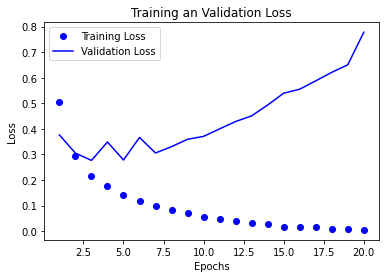

In [5]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label= 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label= "Validation Loss")
plt.title('Training an Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Text(0, 0.5, 'acc')

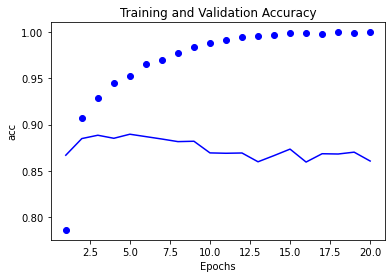

In [17]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label= 'Training Acc')
plt.plot(epochs, val_acc_values, 'b', label= 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')

In [18]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7986 - accuracy: 0.8440


[0.7985910177230835, 0.843999981880188]

In [43]:
model = models.Sequential()
model.add(layers.Dense(32, activation= 'relu', input_shape= (10000,)))
model.add(layers.Dense(16, activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

model.compile(optimizer= 'rmsprop',
             loss= 'binary_crossentropy',
             metrics= ['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs= 4,
                   batch_size= 512,
                   validation_data= (x_val, y_val))


Epoch 1/4
30/30 [==============================] - 1s 41ms/step - loss: 0.4995 - accuracy: 0.7743 - val_loss: 0.3606 - val_accuracy: 0.8675
Epoch 2/4
30/30 [==============================] - 1s 29ms/step - loss: 0.2746 - accuracy: 0.9061 - val_loss: 0.3846 - val_accuracy: 0.8370
Epoch 3/4
30/30 [==============================] - 1s 29ms/step - loss: 0.2040 - accuracy: 0.9291 - val_loss: 0.2785 - val_accuracy: 0.8879
Epoch 4/4
30/30 [==============================] - 1s 28ms/step - loss: 0.1580 - accuracy: 0.9463 - val_loss: 0.2820 - val_accuracy: 0.8882


In [44]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2990 - accuracy: 0.8807


[0.29896876215934753, 0.8806800246238708]